# Name:Krupanidhi Jena
# Reg NO:2141010032
# Sec:16(p)
# B.tech (CSE)

# importing libraries 

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
df=pd.read_csv('train.csv')
pd.set_option('display.max_rows', None)
df.head(50)

,timestamp,value,is_anomaly,predicted
0,1425008573,42,False,44.072500
1,1425008873,41,False,50.709390
2,1425009173,41,False,81.405120
3,1425009473,61,False,39.950367
4,1425009773,44,False,35.350160
5,1425010073,27,False,27.713638
6,1425010373,37,False,41.545710
7,1425010673,36,False,38.743620
8,1425010973,49,False,40.859787
9,1425011273,36,False,25.444733


In [75]:
df.shape

(15830, 4)

# Null value finding but there is no null value present

In [78]:
df.isnull().sum()

timestamp     0
value         0
is_anomaly    0
predicted     0
dtype: int64

In [80]:
df.value_counts('value')

value
29       259
21       252
33       251
30       251
26       245
41       243
32       241
42       241
37       238
36       237
25       236
28       235
34       235
24       234
31       232
39       222
19       220
27       213
23       213
20       212
43       211
35       210
46       210
38       207
44       207
40       205
22       199
48       198
49       187
47       185
17       179
52       179
15       176
45       175
18       174
16       169
50       165
53       157
51       156
56       156
57       154
14       153
13       149
54       148
59       148
55       148
58       147
12       140
61       137
66       134
60       128
63       123
62       122
11       120
64       116
65       115
68       114
69       110
72       110
76       103
67       103
70        96
73        96
74        96
10        96
71        91
77        88
75        84
78        82
79        81
84        81
81        80
85        75
9         74
86        71
82        70
83    

In [82]:
df.value_counts('is_anomaly')

is_anomaly
False    15054
True       776
Name: count, dtype: int64

In [84]:
df['value'].unique()

array([   42,    41,    61,    44,    27,    37,    36,    49,    32,
          50,    43,    47,    45,    56,    40,    57,    73,    59,
         140,    38,    28,    30,    31,    26,    20,    23,    15,
          25,    19,    18,    21,    17,    11,    13,    22,    14,
          16,    24,    29,    10,    39,    34,    35,    53,   222,
          46,   110,    65,    54,    66,   102,    92,    62,    86,
          67,    58,    52,    51,    68,   109,    80,   108,   172,
         271,   456,   440,   477,   426,   284,   159,   112,   118,
          70,    63,   105,    95,   111,   116,   155,   141,   115,
         137,   113,   136,   119,    97,   101,    96,    87,    93,
         103,    99,    90,   154,   131,   130,   100,   122,    89,
         106,   138,   123,   120,    88,   147,   129,    81,    85,
         114,    60,    91,    78,    74,    77,    83,    79,    76,
          98,   104,   117,   107,   204,   229,    82,     7,     9,
          12,     8,

In [86]:
df.corr()

,timestamp,value,is_anomaly,predicted
timestamp,1.000000,0.032628,0.016457,0.030462
value,0.032628,1.000000,0.324859,0.445180
is_anomaly,0.016457,0.324859,1.000000,0.059719
predicted,0.030462,0.445180,0.059719,1.000000


# Plotted the values versus index graph for the training dataset. In general higher values correspond to higher probabilities of being anomaly

Text(0.5, 1.0, 'value vs index')

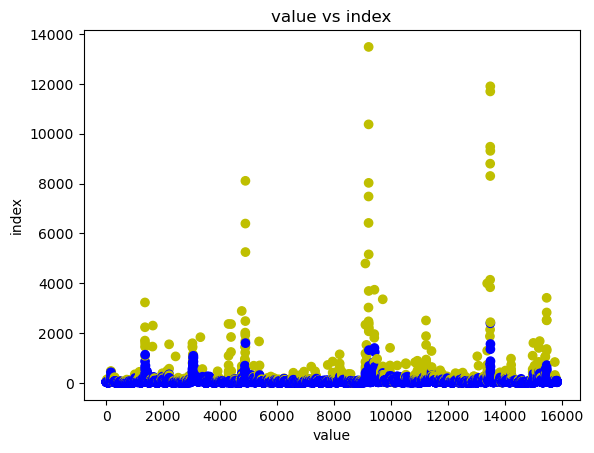

In [89]:
colors = np.where(df["is_anomaly"]==False,'b','y')
plt.scatter(range(15830),df['value'],c=colors,)
plt.xlabel("value")
plt.ylabel("index")
plt.title("value vs index")

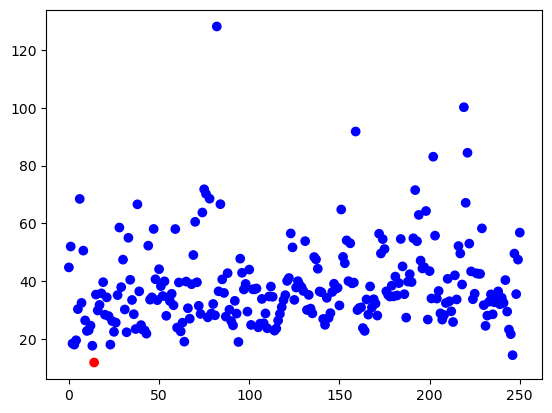

In [90]:
collect=[]
for i in range(15830):
    if df['value'][i]==30:
        if df['is_anomaly'][i]:
            collect.append('r')
        else:
            collect.append('b')
plt.scatter(range(251),df[df['value']==30]['predicted'],c=collect)

# Plotting predicted vs index plot for a fixed actual value of 30.The plot is surprising intuitively because of single anomaly(near predicted<20) however the topmost point is NOT AN ANOMALY despite the large deviation.

## SVC Model fitting because it uses its support vectors to detect to the anomalies 

In [95]:
points=[]
y=[]
for i in range(15830):
    curr=[df['value'][i],abs(df['predicted'][i]-df['value'][i])]
    points.append(curr)
    if df['is_anomaly'][i]==False:
        y.append(0)
    else:
        y.append(1)
from sklearn import svm
anm=svm.SVC(class_weight={0:4,1:95})
anm.fit(points,y)

SVC(class_weight={0: 4, 1: 95})

# F1 Score Predtion

In [97]:
from sklearn.metrics import f1_score
print(f1_score(y,anm.predict(points)))

0.35794061563606644


# Model is ready now we are going to predict over our test set

In [99]:
test=pd.read_csv("test.csv")
print(test.head())

    timestamp  value  predicted
0  1396332000   20.0       20.0
1  1396332300   20.0       20.0
2  1396332600   20.0       20.0
3  1396332900   20.0       20.0
4  1396333200   20.0       20.0


In [100]:
ans=[]
for i in range(3960):
    curr=[test['timestamp'][i]]
    is_anom=anm.predict([[test['value'][i],abs(test['predicted'][i]-test['value'][i])]])
    if is_anom==0:
        curr.append(False)
    else:
        curr.append(True)
    ans.append(curr)
ans=pd.DataFrame(ans,columns=['timestamp','is_anomaly'])

In [101]:
ans.head()
ans.value_counts('is_anomaly')

is_anomaly
False    3869
True       91
Name: count, dtype: int64

In [102]:
test.value_counts('value')

value
20.000000    1440
20.003840     168
20.019200     168
20.096000     168
20.480000     168
22.399999     168
31.999994     168
68.000000     168
77.600000     168
79.520000     168
79.904000     168
79.980800     168
79.996160     168
79.999232     168
79.999846     168
79.999969     168
Name: count, dtype: int64

# Predicting the anomaly and storing it in the ans dataset

In [105]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
def getOutliers(N):
    colors=[]
    vals=[]
    inds=[]
    for i in range(3960):
        if np.isclose(test['value'][i],N):
            vals.append([test['predicted'][i]])
            inds.append(i)
    lof=LocalOutlierFactor(n_neighbors=30)
    clf=IsolationForest()
    pred=lof.fit_predict(vals)
    sz=len(pred)
    for i in pred:
        if i==1:
            ans.loc[inds[i],'is_anomaly']=False
            colors.append('b')
        else:
            ans.loc[inds[i],'is_anomaly']=True
            colors.append('r')
    return colors

In [109]:
ans

,timestamp,is_anomaly
0,1396332000,False
1,1396332300,False
2,1396332600,False
3,1396332900,False
4,1396333200,False
5,1396333500,False
6,1396333800,False
7,1396334100,False
8,1396334400,False
9,1396334700,False
